In [128]:
import os
import numpy as np
import random
import pandas as pd
from sklearn.datasets import samples_generator as gen
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import hex2color
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

np.set_printoptions(linewidth=120)

In [240]:
features = {
    'body shape': ['humanoid', 'unknown' ],
    'main color': ['red', 'blue', 'green', 'brown', 'gray', 'yellow', 'purple', 'white', 'black'],
    'accessory 1': ['cape', 'hammer', 'shield', 'mask', 'net', 'nothing'],
    'accessory 2': ['cape', 'hammer', 'shield', 'mask', 'net', 'nothing'],
    'height': (1, 10)
}

feature_indices = { k: i for i, (k, v) in enumerate(features.items()) }

labels = ['Superman', 'Thor', 'Batman', 'Iron Man', 'Spiderman', 'Groot', 'Captain America', 'Hulk']

In [2]:
def plot_data(data, label, **kwargs):
    for i in set(label):
        x, y = zip(*[x for x, y in zip(data, label) if y == i])
        plt.scatter(x, y, color='C{}'.format(i), **kwargs)   

## Generating training data

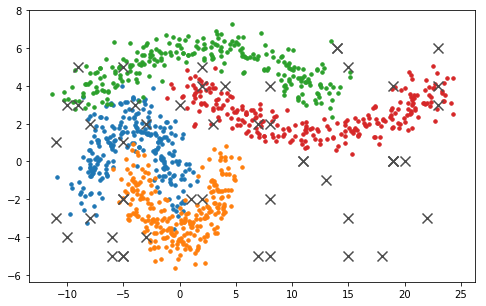

In [177]:
N = 500
T = 50

x1, y1 = gen.make_moons(n_samples=N, noise=0.2)
x2, y2 = gen.make_moons(n_samples=N, noise=0.15)
#x3, y3 = gen.make_blobs(n_samples=N, centers=4, center_box=(-5, 5))
y2 += 2
x1 = (x1 - (1, 0.5)) * 4
x2 = (x2 + (0.2, 1)) * (10, 3)
data = np.concatenate((x1, x2))
label = np.concatenate((y1, y2))
bounds = min(data[:,0]), max(data[:,0]), min(data[:,1]), max(data[:,1])
test = np.array(list(zip(np.random.randint(bounds[0], bounds[1], T),
                         np.random.randint(bounds[2], bounds[3], T))))

plot_data(data, label, s=12)
                      
plt.scatter(test[:,0], test[:,1], color='0.3', marker='x', s = 10**2)    
plt.gcf().set_size_inches(8, 5)
plt.show()

## Train the models

In [190]:
classifiers = [
    ('decision tree gini', DecisionTreeClassifier()),
    ('decision tree entropy', DecisionTreeClassifier(criterion='entropy')),
    ('forest T=1, D=1', RandomForestClassifier(n_estimators=1, max_depth=1)),
    ('forest T=1, D=∞', RandomForestClassifier(n_estimators=1)),
    ('forest T=10, D=1', RandomForestClassifier(n_estimators=10, max_depth=1)),
    ('forest T=10, D=2', RandomForestClassifier(n_estimators=10, max_depth=2)),
    ('forest T=10, D=∞', RandomForestClassifier(n_estimators=10)),
    ('forest T=100, D=2', RandomForestClassifier(n_estimators=100, max_depth=2)),
    ('forest T=100, D=3', RandomForestClassifier(n_estimators=100, max_depth=3)),
    ('forest T=100, D=∞', RandomForestClassifier(n_estimators=100)),
    ('forest T=500, D=2', RandomForestClassifier(n_estimators=500, max_depth=2)),
    ('forest T=500, D=3', RandomForestClassifier(n_estimators=500, max_depth=3)),
    ('forest T=500, D=4', RandomForestClassifier(n_estimators=500, max_depth=4)),
    ('forest T=500, D=∞', RandomForestClassifier(n_estimators=500)),
]

for _, c in classifiers:
    c.fit(data, label)

In [188]:
def compute_proba_heatmap(classifier, space, step, colors):
    assert len(space) == 4
    assert len(step) == 2
    colors = np.array(colors)
    xmin, xmax, ymin, ymax = space
    n_classes = len(colors)
    size = (int((ymax - ymin) / step[1]), int((xmax - xmin) / step[0]))
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step[0]), 
                         np.arange(ymin, ymax, step[1]))
    predictions = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()]).reshape((*size, n_classes))
    heatmap = np.zeros((*size, 3))
    
    for row in range(predictions.shape[0]):
        for col in range(predictions.shape[1]):
            heatmap[row, col, :] = np.sum(predictions[row, col] * colors.T, axis=1)

    return heatmap
    

## Test the models

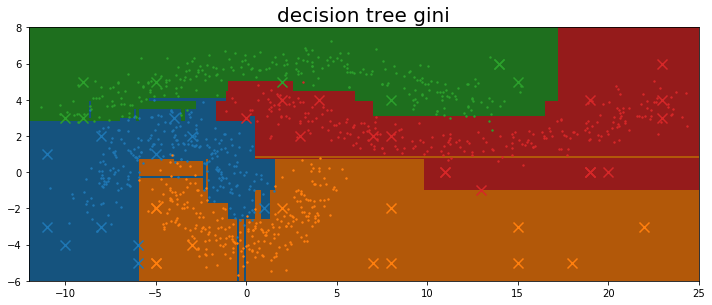

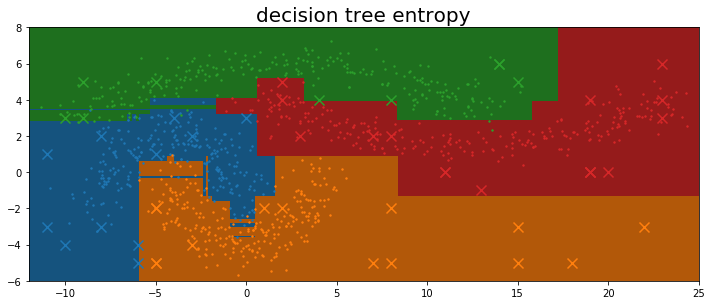

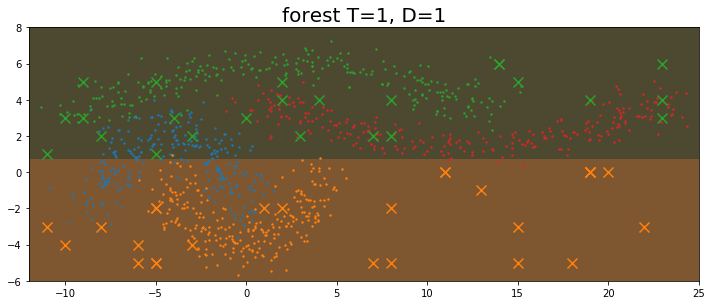

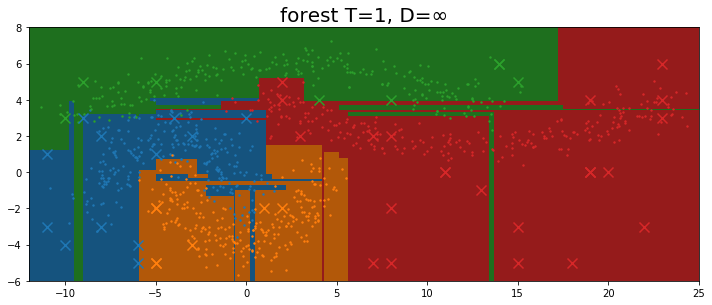

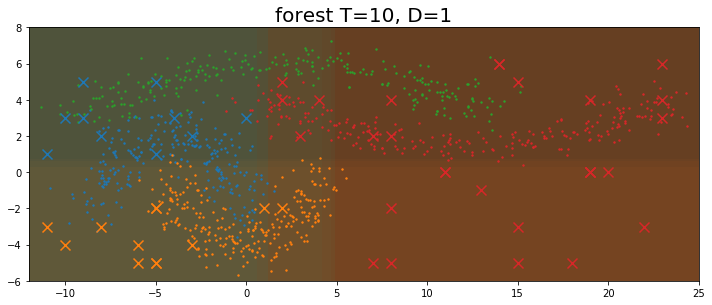

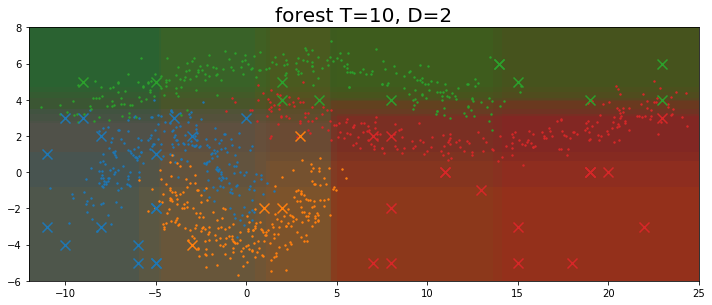

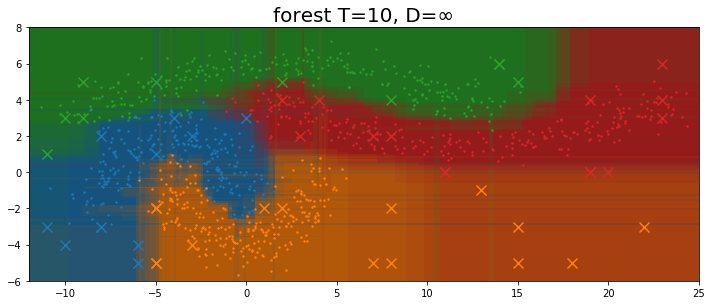

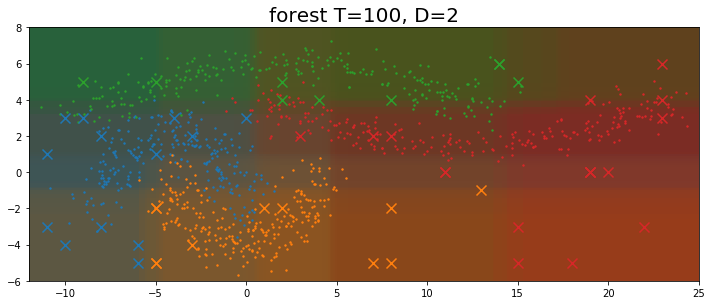

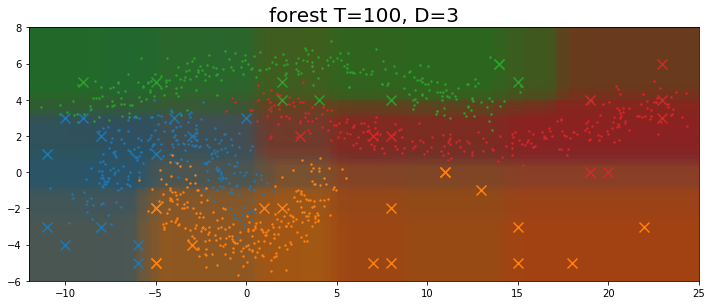

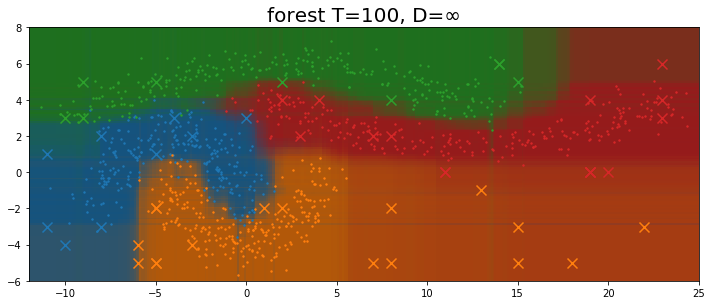

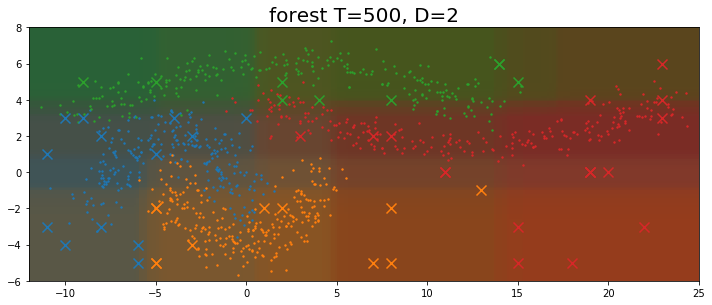

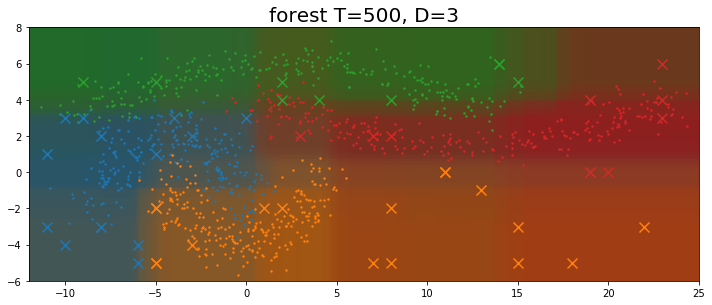

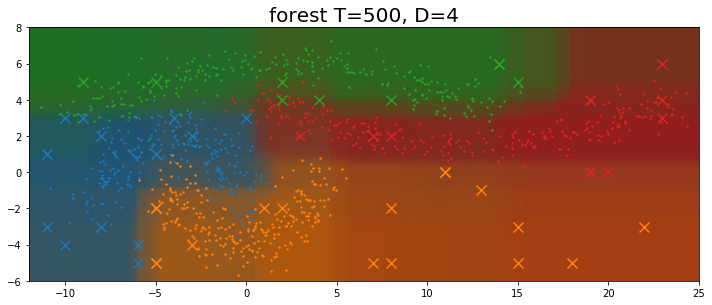

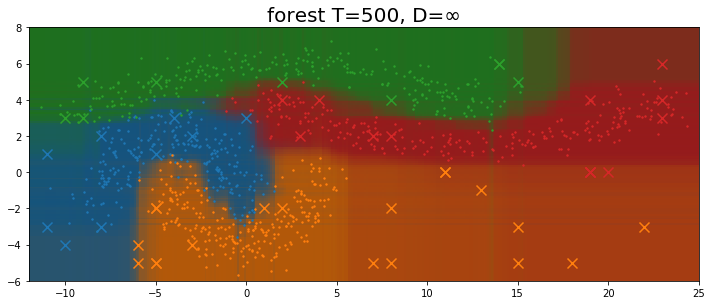

In [195]:
SHOW_HEATMAP = True
HEATMAP_BRIGHTNESS = 0.7
PLOT_SIZE = (12, 6)
HEATMAP_STEP = 0.1

space = (np.floor(data[:,0].min()), np.ceil(data[:,0].max()), 
         np.floor(data[:,1].min()), np.ceil(data[:,1].max()))

colormap = [np.array(hex2color(rcParams['axes.prop_cycle'].by_key()['color'][i]))
            for i in set(label)]


for desc, c in classifiers:    
    res = c.predict(test)
    if SHOW_HEATMAP:
        heatmap = compute_proba_heatmap(c, space, (HEATMAP_STEP, HEATMAP_STEP), colormap)            
        plt.imshow(heatmap * HEATMAP_BRIGHTNESS, extent=space, origin='lower')
    plot_data(data, label, s=2)
    plot_data(test, res, marker='x', s=10**2)

    plt.gcf().set_size_inches(PLOT_SIZE)
    plt.title(desc, fontsize=20)
    plt.show()